In [ ]:
#pip install pyreadstat

In [66]:
import pandas as pd
import pyreadstat
import statsmodels.api as sm
import math
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [67]:
#Load the transformed data
file_path = r'C:\Users\soere\OneDrive\Desktop\Masterstudium\HU\4. Semester\Replication\robustness_aug2005.dta'
df = pd.read_stata(file_path)

In [68]:
#File path to np.dta (data from 1997)
file_path_97 = r'C:\Users\soere\OneDrive\Desktop\Masterstudium\HU\4. Semester\Replication\cs-transfer\soep-v20-stata-de-2004-06-04\np.dta'
df_97, _ = pyreadstat.read_dta(file_path_97)

In [4]:
pd.set_option('display.max_columns', None)
df

,hhnr,persnr,sex,gebjahr,ihhnr,inetto,psample,prgroup,iphrf,ipbleib,emplmnt,newjobposs,durworkcntrct,typebluecolwrkr,typeslfemplmnt,currineduc,typewhitecolwrkr,typecivilsrvnt,hrswork_wk,grossinc,netinc,chancefindcompjob,healthstate,finsecsick,finsecunemp,finsecold,finsecnurse,sscontr,typess,politinterest,supportpolitparty,politparty,politparty_amnt,worrecondev,sathealth,satwork,satsol,sathhinc,satlsr,satdwell,satss,satlifetoday,satlife5yrs,wage_months,wage_amnt,selfemplmntinc_months,selfemplmntinc_amnt,job2inc_months,job2inc_amnt,oldagepension_months,oldagepension_amnt,widowbnft_months,widowbnft_amnt,unemplmntbnft_months,unemplmntbnft_amnt,unemplmntrelf_months,unemplmntrelf_amnt,suballwnc_months,suballwnc_amnt,matbnft_months,matbnft_amnt,studgrnt_months,studgrnt_amnt,notinhhinc_months,notinhhinc_amnt,nrchild,pbbilo,marstatus,laborforcestatus,hhintrinc,hhintrinc_est,hhinc,fedland,year,yearhhnr,ghhnr,gnetto,gphrf,wage_89,wage_amnt89,maternbft_89,maternbft_amnt89,maternlv_89,maternlv_amnt89,selfemplinc_89,selfemplinc_amnt89,job2inc_89,job2inc_amnt89,pension_89,pension_amnt89,widowbft_89,widowbft_amnt89,studgrnt_89,studgrnt_amnt89,unemplbft_89,unemplbft_amnt89,socwelfare_89,socwelfare_amnt89,otherinc_89,otherinc_amnt89,notinhhinc_89,notinhhinc_amnt89,nolistedinc_89,satdem,telephone,hhhnr,hnetto,hphrf,hpbleib,jhhnr,jnetto,jphrf,jpbleib,khhnr,knetto,kphrf,kpbleib,optinc,opthealth,optjob,optfam,optcost,optenvir,optpolit,lhhnr,lnetto,lphrf,lpbleib,mhhnr,mnetto,mphrf,mpbleib,belf_determine_own_life,belf_plans_seldom_work,belf_behavior_determines_life,belf_noone_escapes_fate,belf_luck_determines_success,belf_plans_are_successful,belf_unforseen_undermines_plans,belf_things_happen_differently,prob_new_job_own_initiative,prob_lose_job,prob_promotion,prob_selfemployed,prob_quit_job,prob_leave_labor_force,prob_demotion,prob_retire,prob_change_workhrs,prob_further_educ,prob_raise_above_standard,nhhnr,nnetto,nphrf,npbleib,conffuture,lonely,notenjoywork,hardcope,np0701,np0702,np0703,np0704,np0705,difficultyfindjob,placework_oldBundesland,resfam,respschild,resschild,resunemp,resjob,resfinsecsick,reshelpsick,resold,reshelpold,resfincare,reshelpcare,np113,military_months,military_amnt,neighbourhood,building,garden,newowner,mortgageown,paymortgage,imputedrent,imputedrentdk,getrentincome,rentincome,mortgageother,einzug,bauj,renov,wohnfl,ohhnr,onetto,ophrf,opbleib,import_work,import_inc,import_career_success,phhnr,pnetto,pphrf,ppbleib,belf_determine_own_life99,belf_comp_not_what_deserve99,belf_luck_determines_success99,belf_polit_act_infl_soc_cond99,belf_others_influence99,belf_hard_work_brings_success99,belf_diff_doubt_capabilities99,belf_soc_cond_define_poss99,belf_capab_most_important99,belf_noone_escapes_fate99,worrhealth,qhhnr,qnetto,qphrf,qpbleib,rhhnr,rnetto,rphrf,rpbleib,prob_new_job_own_initiative01,prob_lose_job01,prob_promotion01,prob_selfemployed01,prob_quit_job01,prob_leave_labor_force01,prob_demotion01,prob_retire01,prob_change_workhrs01,prob_further_educ01,prob_raise_above_standard01,shhnr,snetto,sphrf,spbleib,valueofhouse,ptyvalue,finassetsvalue,policiesvalue,sharesvalue,tangassetsvalue,contrtohealth,alimony_months,alimony_amnt,comppension_months,comppension_amnt,privpension_months,privpension_amnt,thhnr,EastWest1989,year90,year91,year92,year93,year94,year95,year96,year97,year98,year99,year00,year01,year02,year03,age,married,divorced,marriedsep,widowed,bilzeit_smaller12,bilzeit_bigger16,selfemployed,civilservant,whitecollar,bluecollar,unemployed,retired,maternity,nonworking,training,othernonworking,college,vocational,secondaryschool,intermediate_tech,noschool,adults,west,east,grossinc2002,netinc2002,hhinc2002,hhintrinc2002,wage_amnt2002,selfemplmntinc_amnt2002,job2inc_amnt2002,oldagepension_amnt2002,widowbnft_amnt2002,unemplmntbnft_amnt2002,unemplmntrelf_amnt2002,suballwnc_amnt2002,matbnft_amnt2002,studgrnt_amnt2002,military_amnt2002,notinhhinc_amnt2002,alimony_amnt2002,comppension_amnt2002,privpension_amnt2002,valueofhouse2002,ptyval

In [69]:
zeroes_and_ones_count = df['year97'].value_counts()
print(zeroes_and_ones_count)

year97
0.0    171404
1.0     11529
Name: count, dtype: int64


In [70]:
# Filter df to include only rows where "year97" is equal to 1
filtered_df = df[df['year97'] == 1]

# Use the isin method to check for matching values in the 'persnr' column
matching_count = filtered_df['persnr'].isin(df_97['persnr']).sum()

print(f'Number of matching values in the "persnr" column: {matching_count}')

Number of matching values in the "persnr" column: 9925


# Check for Multicollinearity

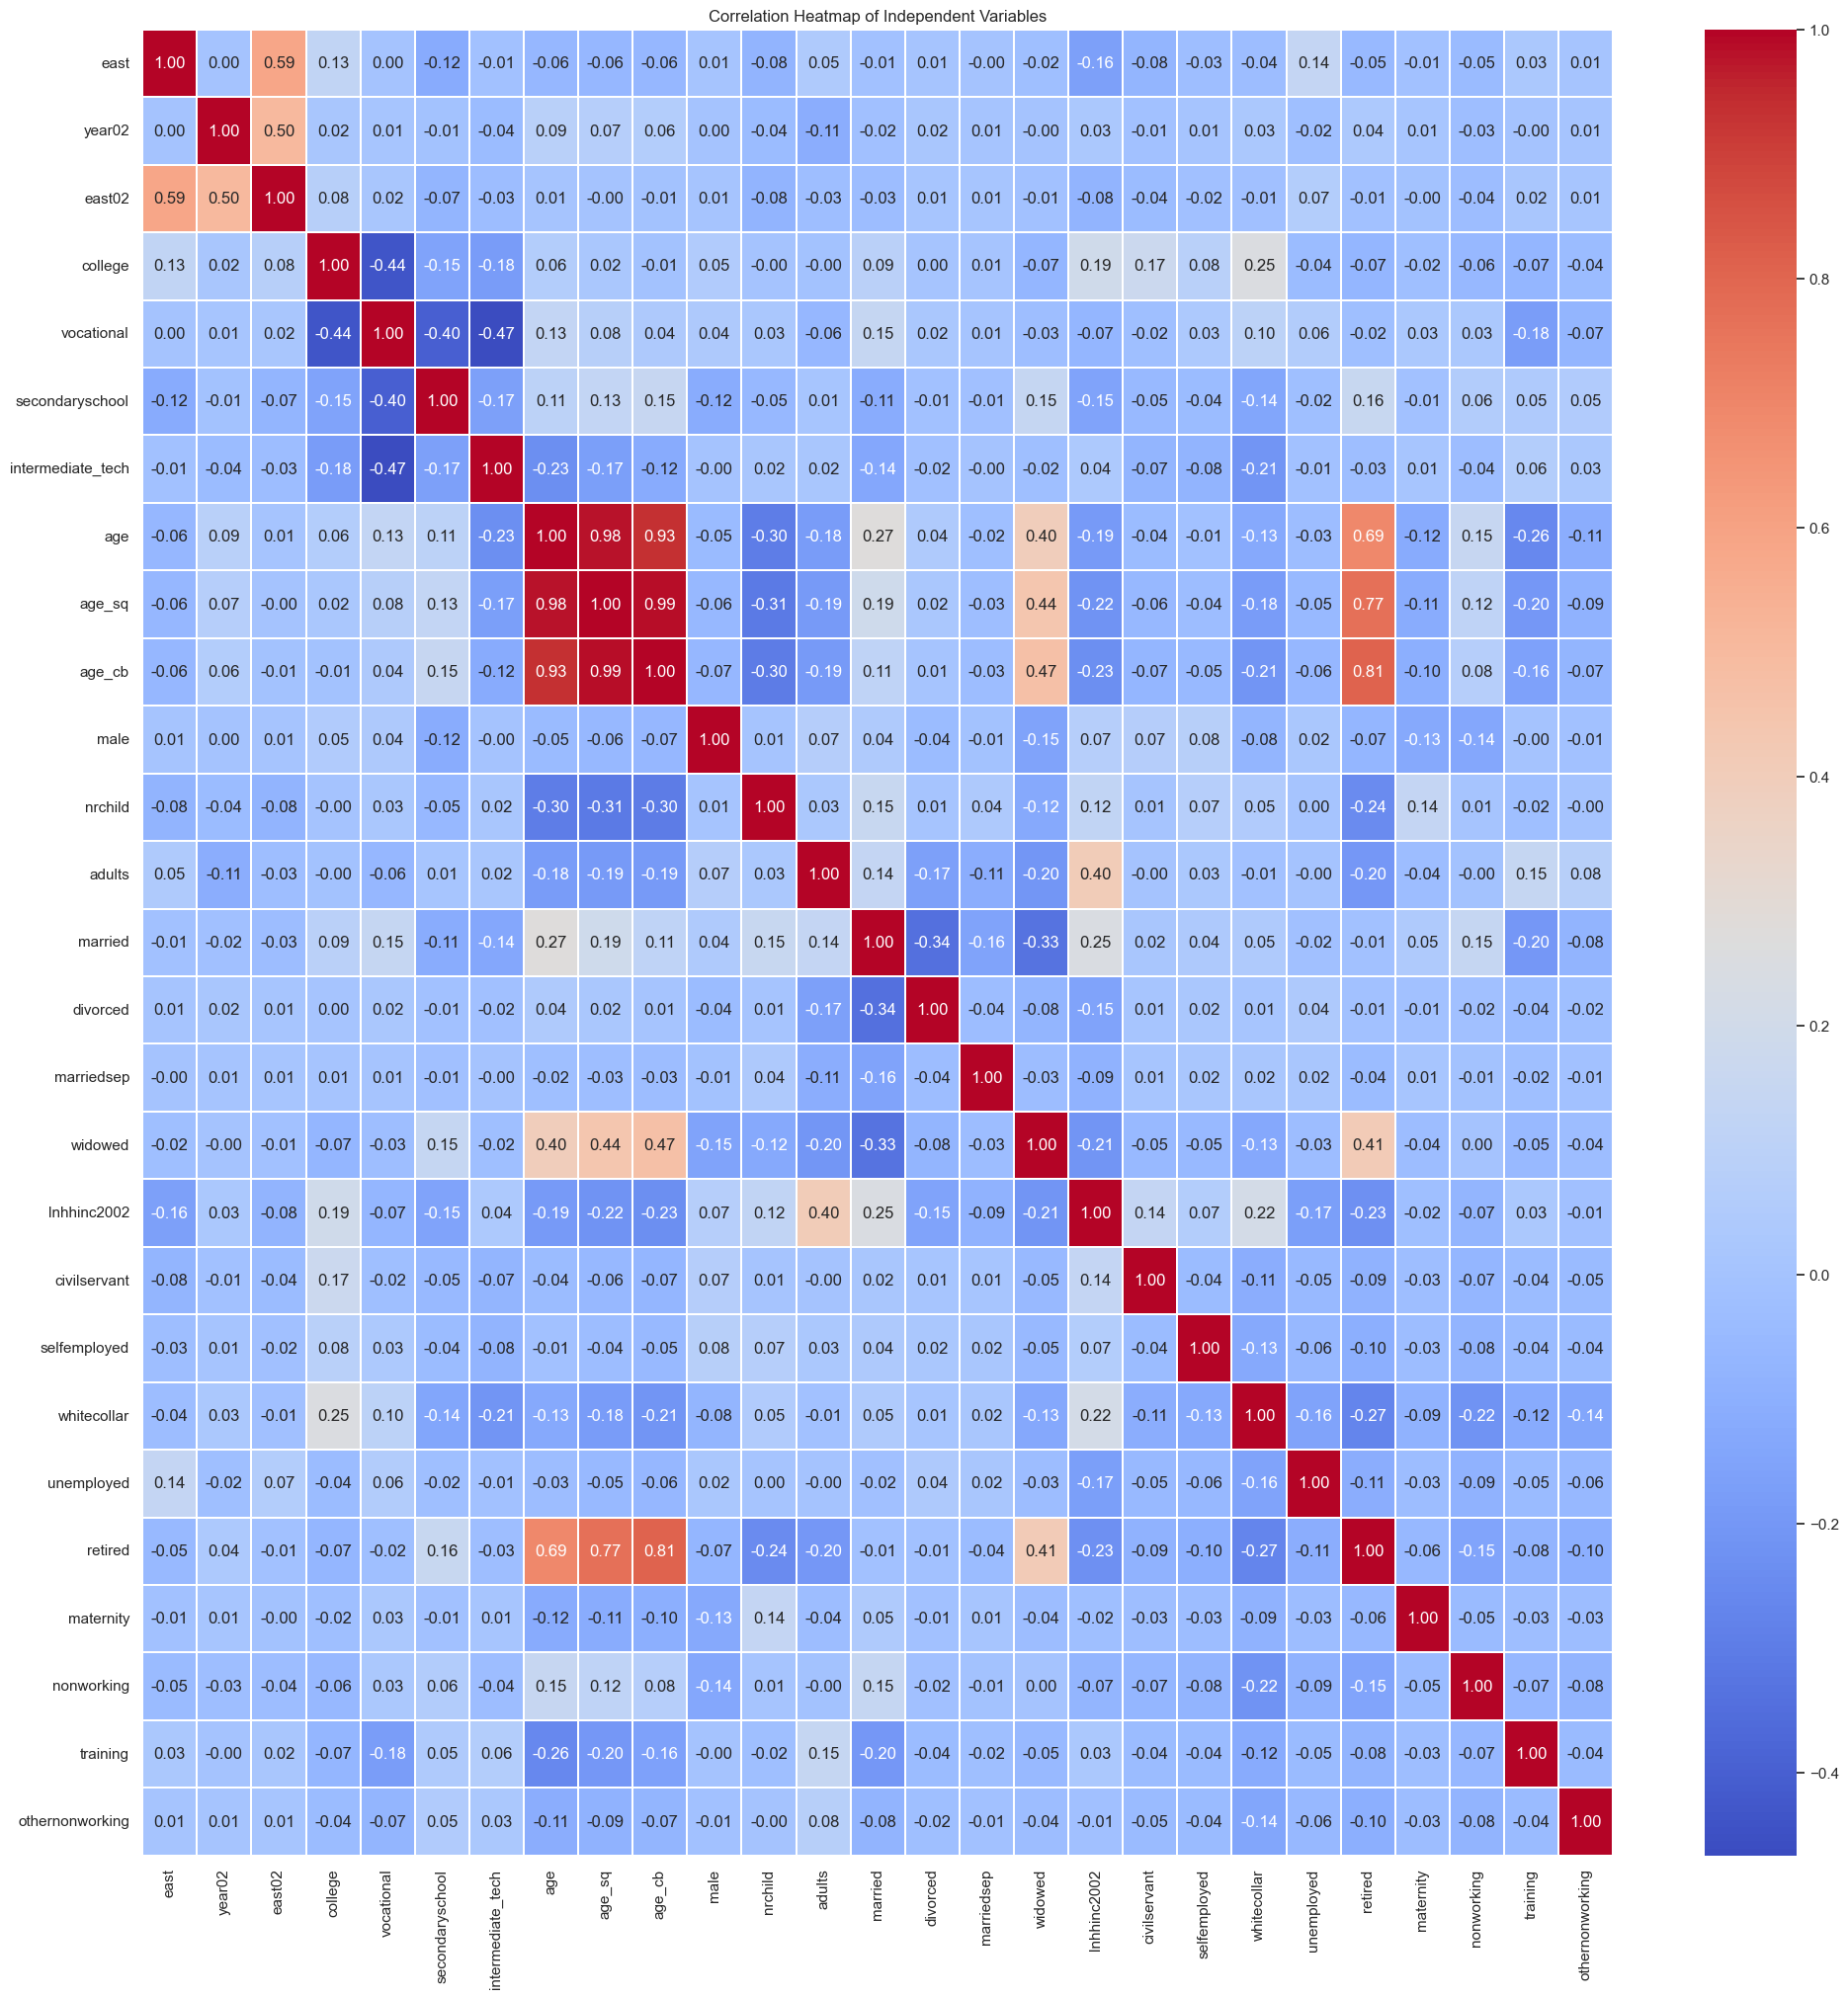

In [71]:
df_multi = df[(df['year02'] == 1) | (df['year97'] == 1)]

var_multi = [
    'east', 'year02', 'east02', 'college', 'vocational', 'secondaryschool', 
    'intermediate_tech', 'age', 'age_sq', 'age_cb', 'male', 'nrchild', 'adults', 
    'married', 'divorced', 'marriedsep', 'widowed', 'lnhhinc2002', 'civilservant', 
    'selfemployed', 'whitecollar', 'unemployed', 'retired', 'maternity', 'nonworking', 
    'training', 'othernonworking'
]

# Calculate the correlation matrix
correlation_matrix = df_multi[var_multi].corr()

# Create a heatmap
plt.figure(figsize=(24,24))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.1)
plt.title("Correlation Heatmap of Independent Variables")
plt.show()

In [72]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the independent variables
X = df_multi[var_multi].dropna()

# Add a constant to the independent variables matrix (required for VIF calculation)
X = pd.concat([pd.Series(1, index=X.index, name='Constant'), X], axis=1)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

             Variable          VIF
0            Constant   884.165064
1                east     2.079359
2              year02     1.659953
3              east02     2.530653
4             college     5.450789
5          vocational     7.717675
6     secondaryschool     4.175658
7   intermediate_tech     1.988939
8                 age   649.415657
9              age_sq  2508.471016
10             age_cb   675.974214
11               male     1.163028
12            nrchild     1.290122
13             adults     1.425449
14            married     3.151789
15           divorced     1.667406
16         marriedsep     1.146961
17            widowed     2.098625
18        lnhhinc2002     1.623814
19       civilservant     1.263949
20       selfemployed     1.257317
21        whitecollar     2.076230
22         unemployed     1.280342
23            retired     4.542185
24          maternity     1.151779
25         nonworking     1.728786
26           training     1.439674
27    othernonworkin

# Logit instead of Probit

In [73]:
# Specify your dependent variable
dependent_var1 = 'stateresunemp'
dependent_var2 = 'stateresfinsecsick'
dependent_var3 = 'stateresfam'
dependent_var4 = 'stateresold'
dependent_var5 = 'stateresfincare'

# Define your independent variables
independent_vars = [
    'east', 'year02', 'east02', 'college', 'vocational', 'secondaryschool', 
    'intermediate_tech', 'age', 'age_sq', 'age_cb', 'male', 'nrchild', 'adults', 
    'married', 'divorced', 'marriedsep', 'widowed', 'lnhhinc2002', 'civilservant', 
    'selfemployed', 'whitecollar', 'unemployed', 'retired', 'maternity', 'nonworking', 
    'training', 'othernonworking'
]

# Filter your DataFrame based on the conditions
df_filtered = df[(df['year02'] == 1) | (df['year97'] == 1)]
df_filtered = df_filtered.dropna(subset=independent_vars)
df_filtered = df_filtered.dropna(subset=[dependent_var1, dependent_var2, dependent_var3, dependent_var4, dependent_var5])

In [74]:
# Add an intercept term to the independent variables
independent_vars = sm.add_constant(df_filtered[independent_vars])

# Make the dependent variables integers
df_filtered[dependent_var1] = df_filtered[dependent_var1].astype(int)
df_filtered[dependent_var2] = df_filtered[dependent_var2].astype(int)
df_filtered[dependent_var3] = df_filtered[dependent_var3].astype(int)
df_filtered[dependent_var4] = df_filtered[dependent_var4].astype(int)
df_filtered[dependent_var5] = df_filtered[dependent_var5].astype(int)

# Fit logistic regression models
logit_model1 = sm.Logit(df_filtered[dependent_var1], independent_vars)
logit_results1 = logit_model1.fit(cov_type='cluster', cov_kwds={'groups': df_filtered['persnr']})

logit_model2 = sm.Logit(df_filtered[dependent_var2], independent_vars)
logit_results2 = logit_model2.fit(cov_type='cluster', cov_kwds={'groups': df_filtered['persnr']})

logit_model3 = sm.Logit(df_filtered[dependent_var3], independent_vars)
logit_results3 = logit_model3.fit(cov_type='cluster', cov_kwds={'groups': df_filtered['persnr']})

logit_model4 = sm.Logit(df_filtered[dependent_var4], independent_vars)
logit_results4 = logit_model4.fit(cov_type='cluster', cov_kwds={'groups': df_filtered['persnr']})

logit_model5 = sm.Logit(df_filtered[dependent_var5], independent_vars)
logit_results5 = logit_model5.fit(cov_type='cluster', cov_kwds={'groups': df_filtered['persnr']})

# View the results
print(logit_results1.summary())
print(logit_results2.summary())
print(logit_results3.summary())
print(logit_results4.summary())
print(logit_results5.summary())


Optimization terminated successfully.
         Current function value: 0.597995
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.659741
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.646720
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.661528
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.678816
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          stateresunemp   No. Observations:                18358
Model:                          Logit   Df Residuals:                    18330
Method:                           MLE   Df Model:                           27
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.02876
Time:                        12:13:32   Log-Likelihood:                -10978.
converged:      

# Religion

In [75]:
# Dummy encode the religion data by changing the -2 and -1 to 0

# Step 1: Replace -2 and -1 with 0 in the specified columns for every row
columns_to_replace = ['np0701', 'np0702', 'np0703', 'np0704', 'np0705']

for col in columns_to_replace:
    df_97[col] = df_97[col].replace({-2: 0, -1: 0})

# Step 2: Convert all values in the DataFrame to integers
df_97[columns_to_replace] = df_97[columns_to_replace].astype(int)

df_97

,hhnr,hhnrakt,nhhnr,persnr,welle,npspkz,nbefrper,np0101,np0102,np0103,np0104,np0105,np0106,np0107,np0108,np0109,np0110,np0201,np0208,np0215,np0202,np0209,np0216,np0203,np0210,np0217,np0204,np0211,np0218,np0205,np0212,np0219,np0206,np0213,np0220,np0207,np0214,np0221,np0301,np0302,np0303,np0304,np0305,np0306,np0307,np0308,np0401,np0402,np0403,np0404,np05,np0601,np0602,np0603,np0604,np0701,np0702,np0703,np0704,np0705,np08,np09,np1001,np1002,np1003,np1004,np1005,np1006,np1007,np1008,np1009,np1010,np1011,np1012,np1013,np1014,np1015,np1016,np11,np12,np13,np14,np15,np16,np17,np18,np1901,np1902,np20,np21,np2201,np2202,np23,np2401,np2402,np2403,np2404,np2405,np2406,np2407,np2408,np25,np26,np2701,np2702,np2703,np2704,np2705,np2706,np2707,np29,np3001,np3002,np3003,np3004,np3005,np3006,np3101,np32,np3301,np3302,np3401,np3402,np3501,np3502,np3503,np3504,np3505,np36,np37,np38,np3901,np3902,np40,np41,np4201,np4202,np4203,np4301,np4302,np44,np45,np4601,np4602,np47,np48,np49,np50a01,np50a02,np50b01,np50b02,np51,np5201,np5202,np5301,np5302,np5401,np5402,np5501,np5502,np5503,np5504,np5701,np5702,np5801,np5802,np5803,np5804,np5805,np5806,np5807,np5808,np5809,np5810,np5811,np5812,np5813,np5814,np5815,np5816,np5817,np5818,np5819,np5820,np5821,np5822,np5823,np5901,np5902,np5903,np6001,np6002,np6003,np6004,np6005,np6006,np61,np6201,np6202,np6301,np6302,np6401,np6402,np6403,np6404,np6405,np6406,np6407,np6408,np6409,np6410,np6411,np6412,np6501,np6502,np67a01,np67a02,np67a03,np67b01,np67b02,np67b03,np67c01,np67c02,np67c03,np67d01,np67d02,np67d03,np67e01,np67e02,np67e03,np67f01,np67f02,np67f03,np67g01,np67g02,np67g03,np67h01,np67h02,np67h03,np67i01,np67i02,np67i03,np67j01,np67j02,np67j03,np67k01,np67k02,np67k03,np67l01,np67l02,np67l03,np67m01,np67m02,np67m03,np67n,np6801,np6802,np6803,np6804,np6805,np6806,np6807,np6808,np6809,np6810,np6811,np6812,np6813,np6901,np6902,np6903,np6904,np6905,np7001,np7002,np7003,np7004,np7005,np7006,np7007,np7008,np7009,np7010,np7011,np7012,np7013,np7014,np7015,np7016,np7017,np7018,np7101,np7102,np7103,np7104,np7105,np7106,np7201,np7202,np7203,np7204,np7205,np7206,np7207,np7208,np7209,np7210,np7211,np7212,np73,np74,np7501,np7502,np7503,np7504,np7505,np76,np7701,np7702,np7703,np7704,np7705,np7801,np7802,np7803,np7804,np7805,np79,np80,np8101,np8102,np8201,np8202,np8301,np8302,np8303,np84,np8501,np8502,np8601,np8602,np87,np8801,np8802,np8901,np8902,np8903,np8904,np90,np91,np9201,np9202,np9203,np9204,np9205,np9206,np9207,np9208,np9209,np9210,np9211,np93,np9401,np9402,np9403,np9501,np9502,np9503,np9504,np9505,np9506,np9507,np9508,np9509,np9510,np96,np97,np98,np9901,np9902,np10001,np10002,np101,np102,np103a01,np103a02,np103a03,np103a04,np104a,np105a,np106a01,np106a02,np107a,np108a,np109a01,np109a02,np109a03,np110a01,np110a02,np111a01,np111a02,np111a03,np111a04,np111a05,np111a06,np111a07,np111a08,np111a09,np111a10,np11201,np11202,np113,np11401,np11402,np11403,np11501,np11502,np11503,np11504,np11505,np11506,np11507,np11508,np11509,np11510,np11511,np11512,np11513,np11514,np11515,np11516,np11517,np11601,np11602,np11603,np11604,np11605,np11606,np11607,np11608,np11609,np11610,np11611,np11612,np11613,np11614,np11615,np11616,np11617,np11618,np11619,np11620,np11621,np11701,np11702,npinta,npinda1,npinda2,nptagin,npmonin,npintnr,np660a,np660b,np660c,np660d,np660e,np660f,np660g,np660h,np660i,np660j,nis88,nklas,nnace,nis88n,nklasn
0,27,27,27,201,97,2,1,9,-2,9,8,10,10,-2,5,10,9,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,12,13,13,3,3,1,1,1,4,4,3,2,2,-2,-2,3,2,4,3,4,0,1,0,0,0,2,2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,7,4,1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,1

In [76]:
# Count the number of 1s in each column
column_counts = df_97[columns_to_replace].sum()

# Print the counts
print(column_counts)

np0701    3910
np0702    3988
np0703     501
np0704     899
np0705    3967
dtype: int64


This matches with the numbers found on the SOEP website (https://paneldata.org/soep-core/datasets/pl/plh0258_h)

In [77]:
# Rename the columns
# Define the new column names
new_column_names = {
    'np0701': 'catholic',
    'np0702': 'evangelical',
    'np0703': 'otherchristian',
    'np0704': 'otherreligion',
    'np0705': 'nondenominational'
}

# Rename the columns
df_97 = df_97.rename(columns=new_column_names)

## 1997 data only

In [78]:
# Merge the DataFrames
filtered_df = df[df['year97'] == 1]
# Merge filtered_df and df_97 on 'persnr' column
df_merged = filtered_df.merge(df_97[['persnr', 
                                     'catholic', 
                                     'evangelical', 
                                     'otherchristian', 
                                     'otherreligion', 
                                     'nondenominational']], 
                               on='persnr', 
                               how='inner')

1997 without religion

In [79]:
#df_merged = merged_df
# Specify your dependent variables
dependent_var1 = 'stateresunemp'
dependent_var2 = 'stateresfinsecsick'
dependent_var3 = 'stateresfam'
dependent_var4 = 'stateresold'
dependent_var5 = 'stateresfincare'

# Define your independent variables
independent_vars = [
    'east', 'college', 'vocational', 'secondaryschool', 
    'intermediate_tech', 'age', 'age_sq', 'age_cb', 'male', 'nrchild', 'adults', 
    'married', 'divorced', 'marriedsep', 'widowed', 'lnhhinc2002', 'civilservant', 
    'selfemployed', 'whitecollar', 'unemployed', 'retired', 'maternity', 'nonworking', 
    'training', 'othernonworking'
]

# Drop rows with missing values in independent and dependent variables
df_merged = df_merged.dropna(subset=independent_vars + [dependent_var1, dependent_var2, dependent_var3, dependent_var4, dependent_var5])

# Add an intercept
df_merged['const'] = 1
independent_vars = ['const'] + independent_vars

# Make the dependent variables integers
df_merged.loc[:, dependent_var1] = df_merged[dependent_var1].astype(int)
df_merged.loc[:, dependent_var2] = df_merged[dependent_var2].astype(int)
df_merged.loc[:, dependent_var3] = df_merged[dependent_var3].astype(int)
df_merged.loc[:, dependent_var4] = df_merged[dependent_var4].astype(int)
df_merged.loc[:, dependent_var5] = df_merged[dependent_var5].astype(int)

# Fit probit regression models
probit_model1 = sm.Probit(df_merged[dependent_var1], df_merged[independent_vars])
probit_results1 = probit_model1.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model2 = sm.Probit(df_merged[dependent_var2], df_merged[independent_vars])
probit_results2 = probit_model2.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model3 = sm.Probit(df_merged[dependent_var3], df_merged[independent_vars])
probit_results3 = probit_model3.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model4 = sm.Probit(df_merged[dependent_var4], df_merged[independent_vars])
probit_results4 = probit_model4.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model5 = sm.Probit(df_merged[dependent_var5], df_merged[independent_vars])
probit_results5 = probit_model5.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

# View the results
print(probit_results1.summary())
print(probit_results2.summary())
print(probit_results3.summary())
print(probit_results4.summary())
print(probit_results5.summary())

C:\Users\soere\AppData\Local\Temp\ipykernel_10256\706207346.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['const'] = 1


Optimization terminated successfully.
         Current function value: 0.596423
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650003
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.647094
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660383
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.673475
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:          stateresunemp   No. Observations:                 9774
Model:                         Probit   Df Residuals:                     9748
Method:                           MLE   Df Model:                           25
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.03471
Time:                        12:13:49   Log-Likelihood:                -5829.4
converged:      

Now with religion as independent variable

In [80]:
# Specify your dependent variables
dependent_var1 = 'stateresunemp'
dependent_var2 = 'stateresfinsecsick'
dependent_var3 = 'stateresfam'
dependent_var4 = 'stateresold'
dependent_var5 = 'stateresfincare'

# Define your independent variables
independent_vars = [
    'east', 'college', 'vocational', 'secondaryschool', 
    'intermediate_tech', 'age', 'age_sq', 'age_cb', 'male', 'nrchild', 'adults', 
    'married', 'divorced', 'marriedsep', 'widowed', 'lnhhinc2002', 'civilservant', 
    'selfemployed', 'whitecollar', 'unemployed', 'retired', 'maternity', 'nonworking', 
    'training', 'othernonworking', 'catholic', 'evangelical', 'otherchristian', 'otherreligion'
]

# Drop rows with missing values in independent and dependent variables
df_merged = df_merged.dropna(subset=independent_vars + [dependent_var1, dependent_var2, dependent_var3, dependent_var4, dependent_var5])

# Add an intercept
df_merged['const'] = 1
independent_vars = ['const'] + independent_vars

# Make the dependent variables integers
df_merged.loc[:, dependent_var1] = df_merged[dependent_var1].astype(int)
df_merged.loc[:, dependent_var2] = df_merged[dependent_var2].astype(int)
df_merged.loc[:, dependent_var3] = df_merged[dependent_var3].astype(int)
df_merged.loc[:, dependent_var4] = df_merged[dependent_var4].astype(int)
df_merged.loc[:, dependent_var5] = df_merged[dependent_var5].astype(int)

# Fit probit regression models
probit_model1 = sm.Probit(df_merged[dependent_var1], df_merged[independent_vars])
probit_results1 = probit_model1.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model2 = sm.Probit(df_merged[dependent_var2], df_merged[independent_vars])
probit_results2 = probit_model2.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model3 = sm.Probit(df_merged[dependent_var3], df_merged[independent_vars])
probit_results3 = probit_model3.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model4 = sm.Probit(df_merged[dependent_var4], df_merged[independent_vars])
probit_results4 = probit_model4.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model5 = sm.Probit(df_merged[dependent_var5], df_merged[independent_vars])
probit_results5 = probit_model5.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

# View the results
print(probit_results1.summary())
print(probit_results2.summary())
print(probit_results3.summary())
print(probit_results4.summary())
print(probit_results5.summary())

Optimization terminated successfully.
         Current function value: 0.595932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.649847
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.646645
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.659750
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.672924
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:          stateresunemp   No. Observations:                 9774
Model:                         Probit   Df Residuals:                     9744
Method:                           MLE   Df Model:                           29
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.03551
Time:                        12:13:56   Log-Likelihood:                -5824.6
converged:      

## 1997 & 2002 data

In [81]:
filtered_df_2 = df[(df['year02'] == 1) | (df['year97'] == 1)]
merged_df_2 = filtered_df_2.merge(df_97[['persnr', 
                                     'catholic', 
                                     'evangelical', 
                                     'otherchristian', 
                                     'otherreligion', 
                                     'nondenominational']], 
                               on='persnr', 
                               how='inner')


In [82]:
df_merged = merged_df_2
# Specify your dependent variables
dependent_var1 = 'stateresunemp'
dependent_var2 = 'stateresfinsecsick'
dependent_var3 = 'stateresfam'
dependent_var4 = 'stateresold'
dependent_var5 = 'stateresfincare'

# Define your independent variables
independent_vars = [
    'east', 'year02', 'east02', 'college', 'vocational', 'secondaryschool', 
    'intermediate_tech', 'age', 'age_sq', 'age_cb', 'male', 'nrchild', 'adults', 
    'married', 'divorced', 'marriedsep', 'widowed', 'lnhhinc2002', 'civilservant', 
    'selfemployed', 'whitecollar', 'unemployed', 'retired', 'maternity', 'nonworking', 
    'training', 'othernonworking', 'catholic', 'evangelical', 'otherchristian', 'otherreligion'
]

# Drop rows with missing values in independent and dependent variables
df_merged = df_merged.dropna(subset=independent_vars + [dependent_var1, dependent_var2, dependent_var3, dependent_var4, dependent_var5])

# Add an intercept
df_merged['const'] = 1
independent_vars = ['const'] + independent_vars

# Make the dependent variables integers
df_merged.loc[:, dependent_var1] = df_merged[dependent_var1].astype(int)
df_merged.loc[:, dependent_var2] = df_merged[dependent_var2].astype(int)
df_merged.loc[:, dependent_var3] = df_merged[dependent_var3].astype(int)
df_merged.loc[:, dependent_var4] = df_merged[dependent_var4].astype(int)
df_merged.loc[:, dependent_var5] = df_merged[dependent_var5].astype(int)

# Fit probit regression models
probit_model1 = sm.Probit(df_merged[dependent_var1], df_merged[independent_vars])
probit_results1 = probit_model1.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model2 = sm.Probit(df_merged[dependent_var2], df_merged[independent_vars])
probit_results2 = probit_model2.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model3 = sm.Probit(df_merged[dependent_var3], df_merged[independent_vars])
probit_results3 = probit_model3.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model4 = sm.Probit(df_merged[dependent_var4], df_merged[independent_vars])
probit_results4 = probit_model4.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

probit_model5 = sm.Probit(df_merged[dependent_var5], df_merged[independent_vars])
probit_results5 = probit_model5.fit(cov_type='cluster', cov_kwds={'groups': df_merged['persnr']})

# View the results
print(probit_results1.summary())
print(probit_results2.summary())
print(probit_results3.summary())
print(probit_results4.summary())
print(probit_results5.summary())

C:\Users\soere\AppData\Local\Temp\ipykernel_10256\1871400344.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['const'] = 1
C:\Users\soere\AppData\Local\Temp\ipykernel_10256\1871400344.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['const'] = 1


Optimization terminated successfully.
         Current function value: 0.598617
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657844
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.645580
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660028
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677492
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:          stateresunemp   No. Observations:                17110
Model:                         Probit   Df Residuals:                    17078
Method:                           MLE   Df Model:                           31
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.03020
Time:                        12:14:05   Log-Likelihood:                -10242.
converged:      

                          Probit Regression Results                           
Dep. Variable:        stateresfincare   No. Observations:                17110
Model:                         Probit   Df Residuals:                    17078
Method:                           MLE   Df Model:                           31
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.01999
Time:                        12:14:05   Log-Likelihood:                -11592.
converged:                       True   LL-Null:                       -11828.
Covariance Type:              cluster   LLR p-value:                 1.670e-80
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4133      0.319      4.428      0.000       0.788       2.039
east                  0.3367      0.033     10.327      0.000       0.273       0.401
year02                0.

# Reorder

1 = Staatsfreundlich

In [83]:
# Load the data for 2002
#file path to np.dta
file_path_02 = r'C:\Users\soere\OneDrive\Desktop\Masterstudium\HU\4. Semester\Replication\cs-transfer\soep-v20-stata-de-2004-06-04\sp.dta'
df_02, _ = pyreadstat.read_dta(file_path_02)

In [84]:
columns = ['sp8001', 'sp8004', 'sp8006', 'sp8009', 'sp8011']

# Create a dictionary to map numeric codes to descriptions
code_to_description = {
    1: 'Nur der Staat',
    2: 'Vor allem der Staat',
    3: 'Staat als auch priv. Kraefte',
    4: 'Vor allem priv. Kraefte',
    5: 'Nur priv. Kraefte',
    -1: 'keine Angabe'
}

# Create a dictionary to store the frequency counts for each column
category_counts = {}

# Loop through each column and count the frequencies
for column in columns:
    counts = df_02[column].map(code_to_description).value_counts()
    category_counts[column] = counts

# Print the frequency counts for each column with descriptions
for column, counts in category_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()

Column: sp8001
sp8001
Staat als auch priv. Kraefte    12891
Vor allem der Staat              5903
Nur der Staat                    2136
Vor allem priv. Kraefte          1980
Nur priv. Kraefte                 596
keine Angabe                      386
Name: count, dtype: int64

Column: sp8004
sp8004
Vor allem der Staat             9530
Staat als auch priv. Kraefte    7429
Nur der Staat                   5907
Vor allem priv. Kraefte          515
keine Angabe                     386
Nur priv. Kraefte                125
Name: count, dtype: int64

Column: sp8006
sp8006
Staat als auch priv. Kraefte    12306
Vor allem der Staat              7071
Nur der Staat                    2629
Vor allem priv. Kraefte          1283
keine Angabe                      367
Nur priv. Kraefte                 236
Name: count, dtype: int64

Column: sp8009
sp8009
Staat als auch priv. Kraefte    14450
Vor allem der Staat              5305
Nur der Staat                    1883
Vor allem priv. Kraefte          1728
k

In [85]:
columns = ['sp8001', 'sp8004', 'sp8006', 'sp8009', 'sp8011']

# Create a dictionary to map numeric codes to descriptions
code_to_description = {
    1: 'Nur der Staat',
    2: 'Vor allem der Staat',
    3: 'Staat als auch priv. Kraefte',
    4: 'Vor allem priv. Kraefte',
    5: 'Nur priv. Kraefte',
    -1: 'keine Angabe'
}

# Create a dictionary to store the frequency counts for each column
category_counts = {}

# Loop through each column and count the frequencies
for column in columns:
    counts = df_02[column].map(code_to_description).value_counts()
    total_count = counts.sum()  # Calculate the total count
    relative_counts = counts / total_count  # Calculate relative occurrence
    category_counts[column] = {'absolute': counts, 'relative': relative_counts}

# Print the frequency counts for each column with descriptions
for column, counts in category_counts.items():
    print(f"Column: {column}")
    print("Absolute:")
    print(counts['absolute'])
    print("Relative:")
    print(counts['relative'])
    print()

Column: sp8001
Absolute:
sp8001
Staat als auch priv. Kraefte    12891
Vor allem der Staat              5903
Nur der Staat                    2136
Vor allem priv. Kraefte          1980
Nur priv. Kraefte                 596
keine Angabe                      386
Name: count, dtype: int64
Relative:
sp8001
Staat als auch priv. Kraefte    0.539553
Vor allem der Staat             0.247070
Nur der Staat                   0.089402
Vor allem priv. Kraefte         0.082873
Nur priv. Kraefte               0.024946
keine Angabe                    0.016156
Name: count, dtype: float64

Column: sp8004
Absolute:
sp8004
Vor allem der Staat             9530
Staat als auch priv. Kraefte    7429
Nur der Staat                   5907
Vor allem priv. Kraefte          515
keine Angabe                     386
Nur priv. Kraefte                125
Name: count, dtype: int64
Relative:
sp8004
Vor allem der Staat             0.398878
Staat als auch priv. Kraefte    0.310941
Nur der Staat                   0.247238
Vo

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set seaborn style
sns.set(style="whitegrid")

# Create bar charts for each column with seaborn
for column, counts in category_counts.items():
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    plt.title(f"Frequency Counts for {column}")
    plt.xlabel("Categories")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

AttributeError: 'dict' object has no attribute 'index'

<Figure size 800x600 with 0 Axes>

### drop the undecided ones

#rename np9201 resfam;
rename np9202 respschild;
rename np9203 resschild;
#rename np9204 resunemp;
rename np9205 resjob;
#rename np9206 resfinsecsick;
rename np9207 reshelpsick;
rename np9208 resold;
#rename np9209 reshelpold;
rename np9210 resfincare;
#rename np9211 reshelpcare;

dependent_var1 = 'stateresunemp'
dependent_var2 = 'stateresfinsecsick'
dependent_var3 = 'stateresfam'
dependent_var4 = 'stateresold'
dependent_var5 = 'stateresfincare'

In [87]:
columns_02 = ['sp8001', 'sp8004', 'sp8006', 'sp8009', 'sp8011']

for col in columns_02:
    df_02[col] = df_02[col].replace({1: 1, 2: 1, 4: 0, 5:0})
    
df_02[columns_02] = df_02[columns_02].astype(int)

In [88]:
columns_97 = ['np9201', 'np9204', 'np9206', 'np9209', 'np9211']

for col in columns_97:
    df_97[col] = df_97[col].replace({1: 1, 2: 1, 4: 0, 5:0})
    
df_97[columns_97] = df_97[columns_97].astype(int)

In [89]:
#merge it with df

#2002
rename_dep_var = {
    'sp8001': 'rep_fam',
    'sp8006': 'rep_finsecsick',
    'sp8009': 'rep_helpold',
    'sp8004': 'rep_unemp',
    'sp8011': 'rep_helpcare'
}

# Rename the columns
df_02 = df_02.rename(columns=rename_dep_var)

filtered_df_02 = df[(df['year02'] == 1)]
merged_df_02 = filtered_df_02.merge(df_02[['persnr', 
                                     'rep_fam', 
                                     'rep_unemp', 
                                     'rep_finsecsick', 
                                     'rep_helpold', 
                                     'rep_helpcare']], 
                               on='persnr', 
                               how='inner')

#1997
rename_dep_var = {
    'np9201': 'rep_fam',
    'np9206': 'rep_finsecsick',
    'np9209': 'rep_helpold',
    'np9204': 'rep_unemp',
    'np9211': 'rep_helpcare'
}

# Rename the columns
df_97 = df_97.rename(columns=rename_dep_var)

filtered_df_97 = df[(df['year97'] == 1)]
merged_df_97 = filtered_df_97.merge(df_97[['persnr', 
                                     'rep_fam', 
                                     'rep_unemp', 
                                     'rep_finsecsick', 
                                     'rep_helpold', 
                                     'rep_helpcare']], 
                               on='persnr', 
                               how='inner')

In [90]:
concat_df_1 = pd.concat([merged_df_97, merged_df_02], ignore_index=True)

drop the -1s and 3s and create new dataframes

In [91]:
concat_df_1_fam = concat_df_1[concat_df_1['rep_fam'] != -1]
concat_df_1_fam = concat_df_1_fam[concat_df_1_fam['rep_fam'] != 3]

concat_df_1_unemp = concat_df_1[concat_df_1['rep_unemp'] != -1]
concat_df_1_unemp = concat_df_1_unemp[concat_df_1_unemp['rep_unemp'] != 3]

concat_df_1_finsecsick = concat_df_1[concat_df_1['rep_finsecsick'] != -1]
concat_df_1_finsecsick = concat_df_1_finsecsick[concat_df_1_finsecsick['rep_finsecsick'] != 3]

concat_df_1_helpold = concat_df_1[concat_df_1['rep_helpold'] != -1]
concat_df_1_helpold = concat_df_1_helpold[concat_df_1_helpold['rep_helpold'] != 3]

concat_df_1_helpcare = concat_df_1[concat_df_1['rep_helpcare'] != -1]
concat_df_1_helpcare = concat_df_1_helpcare[concat_df_1_helpcare['rep_helpcare'] != 3]

In [92]:
# Specify your dependent variables
dependent_var1 = 'rep_unemp'
dependent_var2 = 'rep_finsecsick'
dependent_var3 = 'rep_fam'
dependent_var4 = 'rep_helpold'
dependent_var5 = 'rep_helpcare'

# Define your independent variables
independent_vars = [
    'east', 'year02', 'east02', 'college', 'vocational', 'secondaryschool', 
    'intermediate_tech', 'age', 'age_sq', 'age_cb', 'male', 'nrchild', 'adults', 
    'married', 'divorced', 'marriedsep', 'widowed', 'lnhhinc2002', 'civilservant', 
    'selfemployed', 'whitecollar', 'unemployed', 'retired', 'maternity', 'nonworking', 
    'training', 'othernonworking']

# Drop rows with missing values in independent and dependent variables
df_unemp = concat_df_1_unemp.dropna(subset=independent_vars + [dependent_var1])
df_finsecsick = concat_df_1_finsecsick.dropna(subset=independent_vars + [dependent_var2])
df_fam = concat_df_1_fam.dropna(subset=independent_vars + [dependent_var3])
df_helpold = concat_df_1_helpold.dropna(subset=independent_vars + [dependent_var4])
df_helpcare = concat_df_1_helpcare.dropna(subset=independent_vars + [dependent_var5])

In [93]:
# Make the dependent variables integers
df_unemp.loc[:, dependent_var1] = df_unemp[dependent_var1].astype(int)
df_finsecsick.loc[:, dependent_var2] = df_finsecsick[dependent_var2].astype(int)
df_fam.loc[:, dependent_var3] = df_fam[dependent_var3].astype(int)
df_helpold.loc[:, dependent_var4] = df_helpold[dependent_var4].astype(int)
df_helpcare.loc[:, dependent_var5] = df_helpcare[dependent_var5].astype(int)

# Add a constant term to independent variables
independent_vars_with_const = sm.add_constant(df_unemp[independent_vars])
probit_model1 = sm.Probit(df_unemp[dependent_var1], independent_vars_with_const)
probit_results1 = probit_model1.fit(cov_type='cluster', cov_kwds={'groups': df_unemp['persnr']})

independent_vars_with_const = sm.add_constant(df_finsecsick[independent_vars])
probit_model2 = sm.Probit(df_finsecsick[dependent_var2], independent_vars_with_const)
probit_results2 = probit_model2.fit(cov_type='cluster', cov_kwds={'groups': df_finsecsick['persnr']})

independent_vars_with_const = sm.add_constant(df_fam[independent_vars])
probit_model3 = sm.Probit(df_fam[dependent_var3], independent_vars_with_const)
probit_results3 = probit_model3.fit(cov_type='cluster', cov_kwds={'groups': df_fam['persnr']})

independent_vars_with_const = sm.add_constant(df_helpold[independent_vars])
probit_model4 = sm.Probit(df_helpold[dependent_var4], independent_vars_with_const)
probit_results4 = probit_model4.fit(cov_type='cluster', cov_kwds={'groups': df_helpold['persnr']})

independent_vars_with_const = sm.add_constant(df_helpcare[independent_vars])
probit_model5 = sm.Probit(df_helpcare[dependent_var5], independent_vars_with_const)
probit_results5 = probit_model5.fit(cov_type='cluster', cov_kwds={'groups': df_helpcare['persnr']})

# View the results
print(probit_results1.summary())
print(probit_results2.summary())
print(probit_results3.summary())
print(probit_results4.summary())
print(probit_results5.summary())


Optimization terminated successfully.
         Current function value: 0.126207
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340678
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.481980
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.492914
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503239
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:              rep_unemp   No. Observations:                13233
Model:                         Probit   Df Residuals:                    13205
Method:                           MLE   Df Model:                           27
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.06700
Time:                        12:14:34   Log-Likelihood:                -1670.1
converged:      

Make the middle ones as pro-state

In [94]:
file_path_02 = r'C:\Users\soere\OneDrive\Desktop\Masterstudium\HU\4. Semester\Replication\cs-transfer\soep-v20-stata-de-2004-06-04\sp.dta'
df_02, _ = pyreadstat.read_dta(file_path_02)

In [95]:
columns_02 = ['sp8001', 'sp8004', 'sp8006', 'sp8009', 'sp8011']

for col in columns_02:
    df_02[col] = df_02[col].replace({1: 1, 2: 1, 3: 1, 4: 0, 5:0})
    
df_02[columns_02] = df_02[columns_02].astype(int)

In [96]:
file_path_02 = r'C:\Users\soere\OneDrive\Desktop\Masterstudium\HU\4. Semester\Replication\cs-transfer\soep-v20-stata-de-2004-06-04\np.dta'
df_97, _ = pyreadstat.read_dta(file_path_02)

In [97]:
columns_97 = ['np9201', 'np9204', 'np9206', 'np9209', 'np9211']

for col in columns_97:
    df_97[col] = df_97[col].replace({1: 1, 2: 1, 3: 1, 4: 0, 5:0})
    
df_97[columns_97] = df_97[columns_97].astype(int)

In [98]:
#merge it with df

#2002
rename_dep_var = {
    'sp8001': 'rep_fam',
    'sp8006': 'rep_finsecsick',
    'sp8009': 'rep_helpold',
    'sp8004': 'rep_unemp',
    'sp8011': 'rep_helpcare'
}

# Rename the columns
df_02 = df_02.rename(columns=rename_dep_var)

filtered_df_02 = df[(df['year02'] == 1)]
merged_df_02 = filtered_df_02.merge(df_02[['persnr', 
                                     'rep_fam', 
                                     'rep_unemp', 
                                     'rep_finsecsick', 
                                     'rep_helpold', 
                                     'rep_helpcare']], 
                               on='persnr', 
                               how='inner')

#1997
rename_dep_var = {
    'np9201': 'rep_fam',
    'np9206': 'rep_finsecsick',
    'np9209': 'rep_helpold',
    'np9204': 'rep_unemp',
    'np9211': 'rep_helpcare'
}

# Rename the columns
df_97 = df_97.rename(columns=rename_dep_var)

filtered_df_97 = df[(df['year97'] == 1)]
merged_df_97 = filtered_df_97.merge(df_97[['persnr', 
                                     'rep_fam', 
                                     'rep_unemp', 
                                     'rep_finsecsick', 
                                     'rep_helpold', 
                                     'rep_helpcare']], 
                               on='persnr', 
                               how='inner')

In [99]:
concat_df_1 = pd.concat([merged_df_97, merged_df_02], ignore_index=True)

In [100]:
concat_df_1_fam = concat_df_1[concat_df_1['rep_fam'] != -1]

concat_df_1_unemp = concat_df_1[concat_df_1['rep_unemp'] != -1]

concat_df_1_finsecsick = concat_df_1[concat_df_1['rep_finsecsick'] != -1]

concat_df_1_helpold = concat_df_1[concat_df_1['rep_helpold'] != -1]

concat_df_1_helpcare = concat_df_1[concat_df_1['rep_helpcare'] != -1]

In [102]:
# Specify your dependent variables
dependent_var1 = 'rep_unemp'
dependent_var2 = 'rep_finsecsick'
dependent_var3 = 'rep_fam'
dependent_var4 = 'rep_helpold'
dependent_var5 = 'rep_helpcare'

# Define your independent variables
independent_vars = [
    'east', 'year02', 'east02', 'college', 'vocational', 'secondaryschool', 
    'intermediate_tech', 'age', 'age_sq', 'age_cb', 'male', 'nrchild', 'adults', 
    'married', 'divorced', 'marriedsep', 'widowed', 'lnhhinc2002', 'civilservant', 
    'selfemployed', 'whitecollar', 'unemployed', 'retired', 'maternity', 'nonworking', 
    'training', 'othernonworking']

# Drop rows with missing values in independent and dependent variables
df_unemp = concat_df_1_unemp.dropna(subset=independent_vars + [dependent_var1])
df_finsecsick = concat_df_1_finsecsick.dropna(subset=independent_vars + [dependent_var2])
df_fam = concat_df_1_fam.dropna(subset=independent_vars + [dependent_var3])
df_helpold = concat_df_1_helpold.dropna(subset=independent_vars + [dependent_var4])
df_helpcare = concat_df_1_helpcare.dropna(subset=independent_vars + [dependent_var5])

# Make the dependent variables integers
df_unemp.loc[:, dependent_var1] = df_unemp[dependent_var1].astype(int)
df_finsecsick.loc[:, dependent_var2] = df_finsecsick[dependent_var2].astype(int)
df_fam.loc[:, dependent_var3] = df_fam[dependent_var3].astype(int)
df_helpold.loc[:, dependent_var4] = df_helpold[dependent_var4].astype(int)
df_helpcare.loc[:, dependent_var5] = df_helpcare[dependent_var5].astype(int)

# Fit probit regression models
independent_vars_with_const = sm.add_constant(df_unemp[independent_vars])
probit_model1 = sm.Probit(df_unemp[dependent_var1], independent_vars_with_const)
probit_results1 = probit_model1.fit(cov_type='cluster', cov_kwds={'groups': df_unemp['persnr']})

independent_vars_with_const = sm.add_constant(df_finsecsick[independent_vars])
probit_model2 = sm.Probit(df_finsecsick[dependent_var2], independent_vars_with_const)
probit_results2 = probit_model2.fit(cov_type='cluster', cov_kwds={'groups': df_finsecsick['persnr']})

independent_vars_with_const = sm.add_constant(df_fam[independent_vars])
probit_model3 = sm.Probit(df_fam[dependent_var3], independent_vars_with_const)
probit_results3 = probit_model3.fit(cov_type='cluster', cov_kwds={'groups': df_fam['persnr']})

independent_vars_with_const = sm.add_constant(df_helpold[independent_vars])
probit_model4 = sm.Probit(df_helpold[dependent_var4], independent_vars_with_const)
probit_results4 = probit_model4.fit(cov_type='cluster', cov_kwds={'groups': df_helpold['persnr']})

independent_vars_with_const = sm.add_constant(df_helpcare[independent_vars])
probit_model5 = sm.Probit(df_helpcare[dependent_var5], independent_vars_with_const)
probit_results5 = probit_model5.fit(cov_type='cluster', cov_kwds={'groups': df_helpcare['persnr']})

# View the results
print(probit_results1.summary())
print(probit_results2.summary())
print(probit_results3.summary())
print(probit_results4.summary())
print(probit_results5.summary())

Optimization terminated successfully.
         Current function value: 0.098913
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.221194
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323237
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.274779
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.282389
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:              rep_unemp   No. Observations:                18489
Model:                         Probit   Df Residuals:                    18461
Method:                           MLE   Df Model:                           27
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.05008
Time:                        12:16:17   Log-Likelihood:                -1828.8
converged:      

# Religion die Zweite

Mit interaction term east times member of a religion

In [110]:
df_interact = merged_df_2.copy()

#Swap values
df_interact['nondenominational'] = df_interact['nondenominational'].map({0:1, 1:0})

# Rename the column
df_interact.rename(columns={'nondenominational': 'memberofreligion'}, inplace=True)

# Create the interaction term
df_interact['east_reg'] = ((df_interact['east'] == 1) & (df_interact['memberofreligion'] == 1)).astype(int)

In [109]:
df_interact[]

,hhnr,persnr,sex,gebjahr,ihhnr,inetto,psample,prgroup,iphrf,ipbleib,emplmnt,newjobposs,durworkcntrct,typebluecolwrkr,typeslfemplmnt,currineduc,typewhitecolwrkr,typecivilsrvnt,hrswork_wk,grossinc,netinc,chancefindcompjob,healthstate,finsecsick,finsecunemp,finsecold,finsecnurse,sscontr,typess,politinterest,supportpolitparty,politparty,politparty_amnt,worrecondev,sathealth,satwork,satsol,sathhinc,satlsr,satdwell,satss,satlifetoday,satlife5yrs,wage_months,wage_amnt,selfemplmntinc_months,selfemplmntinc_amnt,job2inc_months,job2inc_amnt,oldagepension_months,oldagepension_amnt,widowbnft_months,widowbnft_amnt,unemplmntbnft_months,unemplmntbnft_amnt,unemplmntrelf_months,unemplmntrelf_amnt,suballwnc_months,suballwnc_amnt,matbnft_months,matbnft_amnt,studgrnt_months,studgrnt_amnt,notinhhinc_months,notinhhinc_amnt,nrchild,pbbilo,marstatus,laborforcestatus,hhintrinc,hhintrinc_est,hhinc,fedland,year,yearhhnr,ghhnr,gnetto,gphrf,wage_89,wage_amnt89,maternbft_89,maternbft_amnt89,maternlv_89,maternlv_amnt89,selfemplinc_89,selfemplinc_amnt89,job2inc_89,job2inc_amnt89,pension_89,pension_amnt89,widowbft_89,widowbft_amnt89,studgrnt_89,studgrnt_amnt89,unemplbft_89,unemplbft_amnt89,socwelfare_89,socwelfare_amnt89,otherinc_89,otherinc_amnt89,notinhhinc_89,notinhhinc_amnt89,nolistedinc_89,satdem,telephone,hhhnr,hnetto,hphrf,hpbleib,jhhnr,jnetto,jphrf,jpbleib,khhnr,knetto,kphrf,kpbleib,optinc,opthealth,optjob,optfam,optcost,optenvir,optpolit,lhhnr,lnetto,lphrf,lpbleib,mhhnr,mnetto,mphrf,mpbleib,belf_determine_own_life,belf_plans_seldom_work,belf_behavior_determines_life,belf_noone_escapes_fate,belf_luck_determines_success,belf_plans_are_successful,belf_unforseen_undermines_plans,belf_things_happen_differently,prob_new_job_own_initiative,prob_lose_job,prob_promotion,prob_selfemployed,prob_quit_job,prob_leave_labor_force,prob_demotion,prob_retire,prob_change_workhrs,prob_further_educ,prob_raise_above_standard,nhhnr,nnetto,nphrf,npbleib,conffuture,lonely,notenjoywork,hardcope,np0701,np0702,np0703,np0704,np0705,difficultyfindjob,placework_oldBundesland,resfam,respschild,resschild,resunemp,resjob,resfinsecsick,reshelpsick,resold,reshelpold,resfincare,reshelpcare,np113,military_months,military_amnt,neighbourhood,building,garden,newowner,mortgageown,paymortgage,imputedrent,imputedrentdk,getrentincome,rentincome,mortgageother,einzug,bauj,renov,wohnfl,ohhnr,onetto,ophrf,opbleib,import_work,import_inc,import_career_success,phhnr,pnetto,pphrf,ppbleib,belf_determine_own_life99,belf_comp_not_what_deserve99,belf_luck_determines_success99,belf_polit_act_infl_soc_cond99,belf_others_influence99,belf_hard_work_brings_success99,belf_diff_doubt_capabilities99,belf_soc_cond_define_poss99,belf_capab_most_important99,belf_noone_escapes_fate99,worrhealth,qhhnr,qnetto,qphrf,qpbleib,rhhnr,rnetto,rphrf,rpbleib,prob_new_job_own_initiative01,prob_lose_job01,prob_promotion01,prob_selfemployed01,prob_quit_job01,prob_leave_labor_force01,prob_demotion01,prob_retire01,prob_change_workhrs01,prob_further_educ01,prob_raise_above_standard01,shhnr,snetto,sphrf,spbleib,valueofhouse,ptyvalue,finassetsvalue,policiesvalue,sharesvalue,tangassetsvalue,contrtohealth,alimony_months,alimony_amnt,comppension_months,comppension_amnt,privpension_months,privpension_amnt,thhnr,EastWest1989,year90,year91,year92,year93,year94,year95,year96,year97,year98,year99,year00,year01,year02,year03,age,married,divorced,marriedsep,widowed,bilzeit_smaller12,bilzeit_bigger16,selfemployed,civilservant,whitecollar,bluecollar,unemployed,retired,maternity,nonworking,training,othernonworking,college,vocational,secondaryschool,intermediate_tech,noschool,adults,west,east,grossinc2002,netinc2002,hhinc2002,hhintrinc2002,wage_amnt2002,selfemplmntinc_amnt2002,job2inc_amnt2002,oldagepension_amnt2002,widowbnft_amnt2002,unemplmntbnft_amnt2002,unemplmntrelf_amnt2002,suballwnc_amnt2002,matbnft_amnt2002,studgrnt_amnt2002,military_amnt2002,notinhhinc_amnt2002,alimony_amnt2002,comppension_amnt2002,privpension_amnt2002,valueofhouse2002,ptyval

In [111]:
# Specify your dependent variables
dependent_var1 = 'stateresunemp'
dependent_var2 = 'stateresfinsecsick'
dependent_var3 = 'stateresfam'
dependent_var4 = 'stateresold'
dependent_var5 = 'stateresfincare'

# Define your independent variables
independent_vars = [
    'east', 'year02', 'east02', 'college', 'vocational', 'secondaryschool', 
    'intermediate_tech', 'age', 'age_sq', 'age_cb', 'male', 'nrchild', 'adults', 
    'married', 'divorced', 'marriedsep', 'widowed', 'lnhhinc2002', 'civilservant', 
    'selfemployed', 'whitecollar', 'unemployed', 'retired', 'maternity', 'nonworking', 
    'training', 'othernonworking', 'memberofreligion', 'east_reg'
]

# Drop rows with missing values in independent and dependent variables
df_interact = df_interact.dropna(subset=independent_vars + [dependent_var1, dependent_var2, dependent_var3, dependent_var4, dependent_var5])

# Add an intercept
df_interact['const'] = 1
independent_vars = ['const'] + independent_vars

# Make the dependent variables integers
df_interact.loc[:, dependent_var1] = df_interact[dependent_var1].astype(int)
df_interact.loc[:, dependent_var2] = df_interact[dependent_var2].astype(int)
df_interact.loc[:, dependent_var3] = df_interact[dependent_var3].astype(int)
df_interact.loc[:, dependent_var4] = df_interact[dependent_var4].astype(int)
df_interact.loc[:, dependent_var5] = df_interact[dependent_var5].astype(int)

# Fit probit regression models
probit_model1 = sm.Probit(df_interact[dependent_var1], df_interact[independent_vars])
probit_results1 = probit_model1.fit(cov_type='cluster', cov_kwds={'groups': df_interact['persnr']})

probit_model2 = sm.Probit(df_interact[dependent_var2], df_interact[independent_vars])
probit_results2 = probit_model2.fit(cov_type='cluster', cov_kwds={'groups': df_interact['persnr']})

probit_model3 = sm.Probit(df_interact[dependent_var3], df_interact[independent_vars])
probit_results3 = probit_model3.fit(cov_type='cluster', cov_kwds={'groups': df_interact['persnr']})

probit_model4 = sm.Probit(df_interact[dependent_var4], df_interact[independent_vars])
probit_results4 = probit_model4.fit(cov_type='cluster', cov_kwds={'groups': df_interact['persnr']})

probit_model5 = sm.Probit(df_interact[dependent_var5], df_interact[independent_vars])
probit_results5 = probit_model5.fit(cov_type='cluster', cov_kwds={'groups': df_interact['persnr']})

# View the results
print(probit_results1.summary())
print(probit_results2.summary())
print(probit_results3.summary())
print(probit_results4.summary())
print(probit_results5.summary())

Optimization terminated successfully.
         Current function value: 0.598873
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657903
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.645446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677525
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:          stateresunemp   No. Observations:                17110
Model:                         Probit   Df Residuals:                    17080
Method:                           MLE   Df Model:                           29
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.02979
Time:                        16:36:13   Log-Likelihood:                -10247.
converged:      

# Interpreting coefficients

In [11]:
def logit_coeff_to_percentage(logit_coefficient):
    # Calculate the percentage using the logistic function
    odds = math.exp(logit_coefficient)
    percentage = (odds / (1 + odds)) * 100
    return percentage


logit_coefficient = 0.59
percentage = logit_coeff_to_percentage(logit_coefficient)
print(f"Percentage (Logit): {percentage:.2f}%")

logit_coefficient_1 =  0.71
percentage_1 = logit_coeff_to_percentage(logit_coefficient_1)
print(f"Percentage (Logit): {percentage_1:.2f}%")

Percentage (Logit): 64.34%
Percentage (Logit): 67.04%


In [6]:
w1 = 0.6313

# Calculate the marginal effect using the logistic function
marginal_effect = 1 / (1 + np.exp(-w1))

print("Marginal Effect:", marginal_effect)

Marginal Effect: 0.6527841747816019


In [237]:


def probit_coeff_to_percentage(probit_coefficient):
    # Calculate the percentage using the inverse CDF (percent point function) of the standard normal distribution
    z_score = probit_coefficient
    percentage = (1 - stats.norm.cdf(z_score)) * 100
    return percentage

# Example usage:
probit_coefficient = 0.37
percentage = probit_coeff_to_percentage(probit_coefficient)
print(f"Percentage (Probit): {percentage:.2f}%")


Percentage (Probit): 35.57%


In [11]:
import scipy.stats as stats

def calculate_marginal_effect(coeff_x):
    # Calculate the marginal effect
    marginal_effect = coeff_x * (stats.norm.cdf(coeff_x) - (1 - stats.norm.cdf(coeff_x)))
    return marginal_effect

# Example usage:
coeff_x = 0.47  # Replace with the coefficient of your dummy variable 'x'
marginal_effect_x = calculate_marginal_effect(coeff_x)
print(f"Marginal Effect of 'x': {marginal_effect_x:.4f}")


Marginal Effect of 'x': 0.1700
